## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  33.333323  1262.870236  0.209198  2.661930  1.364371
1  24.892302   450.224668  0.539540  3.177881  1.444148
2  38.892521   505.930832  0.780592  8.556770  1.342806
3  80.392530   237.541851  0.926650  9.629519  1.267781
4  12.814788  1739.177574  0.276086  2.365655  1.540071


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.9838  | train_mse: 2.52224 | train_mae: 1.20541 |  0:00:00s
epoch 1  | loss: 0.57686 | train_mse: 2.45699 | train_mae: 1.11495 |  0:00:00s
epoch 2  | loss: 0.72085 | train_mse: 1.92078 | train_mae: 1.05694 |  0:00:00s


epoch 3  | loss: 0.46749 | train_mse: 1.24661 | train_mae: 0.89859 |  0:00:00s
epoch 4  | loss: 0.42177 | train_mse: 1.26356 | train_mae: 0.909   |  0:00:00s
epoch 5  | loss: 0.36142 | train_mse: 1.1082  | train_mae: 0.87645 |  0:00:00s


epoch 6  | loss: 0.36264 | train_mse: 0.79932 | train_mae: 0.74311 |  0:00:00s
epoch 7  | loss: 0.26884 | train_mse: 0.98605 | train_mae: 0.73573 |  0:00:00s
epoch 8  | loss: 0.29462 | train_mse: 1.12281 | train_mae: 0.79171 |  0:00:00s


epoch 9  | loss: 0.3454  | train_mse: 1.01016 | train_mae: 0.74018 |  0:00:00s
epoch 10 | loss: 0.40622 | train_mse: 0.6429  | train_mae: 0.60516 |  0:00:00s
epoch 11 | loss: 0.22176 | train_mse: 0.39126 | train_mae: 0.49224 |  0:00:00s
epoch 12 | loss: 0.32163 | train_mse: 0.54256 | train_mae: 0.55022 |  0:00:01s


epoch 13 | loss: 0.3684  | train_mse: 0.66552 | train_mae: 0.58541 |  0:00:01s
epoch 14 | loss: 0.22606 | train_mse: 0.79841 | train_mae: 0.62409 |  0:00:01s
epoch 15 | loss: 0.35675 | train_mse: 0.82928 | train_mae: 0.63603 |  0:00:01s
epoch 16 | loss: 0.27377 | train_mse: 0.50043 | train_mae: 0.54842 |  0:00:01s


epoch 17 | loss: 0.25043 | train_mse: 0.37507 | train_mae: 0.48168 |  0:00:01s
epoch 18 | loss: 0.20305 | train_mse: 0.3811  | train_mae: 0.46928 |  0:00:01s
epoch 19 | loss: 0.40095 | train_mse: 0.4309  | train_mae: 0.50301 |  0:00:01s


epoch 20 | loss: 0.17068 | train_mse: 0.47479 | train_mae: 0.5299  |  0:00:01s
epoch 21 | loss: 0.15072 | train_mse: 0.38809 | train_mae: 0.47668 |  0:00:01s
epoch 22 | loss: 0.19859 | train_mse: 0.2872  | train_mae: 0.41941 |  0:00:01s
epoch 23 | loss: 0.17277 | train_mse: 0.25747 | train_mae: 0.38583 |  0:00:01s


epoch 24 | loss: 0.23187 | train_mse: 0.27538 | train_mae: 0.39948 |  0:00:01s
epoch 25 | loss: 0.2264  | train_mse: 0.24116 | train_mae: 0.37548 |  0:00:01s
epoch 26 | loss: 0.16206 | train_mse: 0.25326 | train_mae: 0.38546 |  0:00:01s
epoch 27 | loss: 0.21822 | train_mse: 0.33378 | train_mae: 0.44016 |  0:00:02s


epoch 28 | loss: 0.15157 | train_mse: 0.29958 | train_mae: 0.42089 |  0:00:02s
epoch 29 | loss: 0.14742 | train_mse: 0.24361 | train_mae: 0.38191 |  0:00:02s
epoch 30 | loss: 0.13674 | train_mse: 0.1965  | train_mae: 0.34068 |  0:00:02s
epoch 31 | loss: 0.17001 | train_mse: 0.153   | train_mae: 0.30811 |  0:00:02s


epoch 32 | loss: 0.2121  | train_mse: 0.18975 | train_mae: 0.32891 |  0:00:02s
epoch 33 | loss: 0.16349 | train_mse: 0.18217 | train_mae: 0.32305 |  0:00:02s
epoch 34 | loss: 0.11212 | train_mse: 0.14611 | train_mae: 0.29656 |  0:00:02s


epoch 35 | loss: 0.10702 | train_mse: 0.13015 | train_mae: 0.28341 |  0:00:02s
epoch 36 | loss: 0.13309 | train_mse: 0.11516 | train_mae: 0.26096 |  0:00:02s
epoch 37 | loss: 0.11822 | train_mse: 0.11174 | train_mae: 0.25711 |  0:00:02s


epoch 38 | loss: 0.15852 | train_mse: 0.12703 | train_mae: 0.26573 |  0:00:02s
epoch 39 | loss: 0.19412 | train_mse: 0.11897 | train_mae: 0.26572 |  0:00:02s
epoch 40 | loss: 0.14889 | train_mse: 0.12806 | train_mae: 0.28536 |  0:00:02s
epoch 41 | loss: 0.18705 | train_mse: 0.11237 | train_mae: 0.26088 |  0:00:03s


epoch 42 | loss: 0.22074 | train_mse: 0.11593 | train_mae: 0.26117 |  0:00:03s
epoch 43 | loss: 0.16251 | train_mse: 0.11992 | train_mae: 0.2718  |  0:00:03s


epoch 44 | loss: 0.14631 | train_mse: 0.12717 | train_mae: 0.28112 |  0:00:03s
epoch 45 | loss: 0.16159 | train_mse: 0.09841 | train_mae: 0.24549 |  0:00:03s
epoch 46 | loss: 0.13411 | train_mse: 0.08716 | train_mae: 0.23501 |  0:00:03s


epoch 47 | loss: 0.18068 | train_mse: 0.09013 | train_mae: 0.23602 |  0:00:03s
epoch 48 | loss: 0.08756 | train_mse: 0.0928  | train_mae: 0.23819 |  0:00:03s
epoch 49 | loss: 0.16993 | train_mse: 0.10434 | train_mae: 0.24984 |  0:00:03s
epoch 50 | loss: 0.15913 | train_mse: 0.08849 | train_mae: 0.23495 |  0:00:03s


epoch 51 | loss: 0.0982  | train_mse: 0.08094 | train_mae: 0.22175 |  0:00:03s
epoch 52 | loss: 0.11886 | train_mse: 0.07305 | train_mae: 0.21282 |  0:00:03s
epoch 53 | loss: 0.1372  | train_mse: 0.072   | train_mae: 0.2073  |  0:00:03s


epoch 54 | loss: 0.09686 | train_mse: 0.07842 | train_mae: 0.21455 |  0:00:04s
epoch 55 | loss: 0.14161 | train_mse: 0.09363 | train_mae: 0.23723 |  0:00:04s
epoch 56 | loss: 0.12683 | train_mse: 0.11339 | train_mae: 0.24539 |  0:00:04s
epoch 57 | loss: 0.1181  | train_mse: 0.13377 | train_mae: 0.26005 |  0:00:04s


epoch 58 | loss: 0.35374 | train_mse: 0.1189  | train_mae: 0.25132 |  0:00:04s
epoch 59 | loss: 0.14535 | train_mse: 0.09124 | train_mae: 0.23213 |  0:00:04s
epoch 60 | loss: 0.16004 | train_mse: 0.08088 | train_mae: 0.21804 |  0:00:04s
epoch 61 | loss: 0.17417 | train_mse: 0.08529 | train_mae: 0.22083 |  0:00:04s


epoch 62 | loss: 0.12055 | train_mse: 0.07535 | train_mae: 0.20661 |  0:00:04s
epoch 63 | loss: 0.16302 | train_mse: 0.10962 | train_mae: 0.25934 |  0:00:04s
epoch 64 | loss: 0.184   | train_mse: 0.08939 | train_mae: 0.22476 |  0:00:04s


epoch 65 | loss: 0.24954 | train_mse: 0.07822 | train_mae: 0.21843 |  0:00:04s
epoch 66 | loss: 0.12208 | train_mse: 0.07266 | train_mae: 0.20846 |  0:00:04s
epoch 67 | loss: 0.10073 | train_mse: 0.06749 | train_mae: 0.19449 |  0:00:04s


epoch 68 | loss: 0.16189 | train_mse: 0.06338 | train_mae: 0.18606 |  0:00:04s
epoch 69 | loss: 0.25847 | train_mse: 0.0691  | train_mae: 0.19926 |  0:00:05s
epoch 70 | loss: 0.22857 | train_mse: 0.08329 | train_mae: 0.21499 |  0:00:05s
epoch 71 | loss: 0.0997  | train_mse: 0.10177 | train_mae: 0.22719 |  0:00:05s
epoch 72 | loss: 0.11031 | train_mse: 0.11493 | train_mae: 0.24141 |  0:00:05s


epoch 73 | loss: 0.24078 | train_mse: 0.13251 | train_mae: 0.25695 |  0:00:05s
epoch 74 | loss: 0.1283  | train_mse: 0.1161  | train_mae: 0.25426 |  0:00:05s
epoch 75 | loss: 0.14989 | train_mse: 0.0935  | train_mae: 0.23306 |  0:00:05s
epoch 76 | loss: 0.15166 | train_mse: 0.09102 | train_mae: 0.23626 |  0:00:05s


epoch 77 | loss: 0.14733 | train_mse: 0.07312 | train_mae: 0.21105 |  0:00:05s
epoch 78 | loss: 0.099   | train_mse: 0.07302 | train_mae: 0.21159 |  0:00:05s
epoch 79 | loss: 0.16804 | train_mse: 0.07588 | train_mae: 0.21941 |  0:00:05s
epoch 80 | loss: 0.08988 | train_mse: 0.07257 | train_mae: 0.21962 |  0:00:05s


epoch 81 | loss: 0.2143  | train_mse: 0.08839 | train_mae: 0.24399 |  0:00:05s
epoch 82 | loss: 0.10337 | train_mse: 0.08462 | train_mae: 0.2368  |  0:00:05s
epoch 83 | loss: 0.27806 | train_mse: 0.08944 | train_mae: 0.24293 |  0:00:05s


epoch 84 | loss: 0.11104 | train_mse: 0.09996 | train_mae: 0.25503 |  0:00:06s
epoch 85 | loss: 0.11938 | train_mse: 0.08614 | train_mae: 0.23457 |  0:00:06s
epoch 86 | loss: 0.14399 | train_mse: 0.07642 | train_mae: 0.21917 |  0:00:06s


epoch 87 | loss: 0.14243 | train_mse: 0.06961 | train_mae: 0.21086 |  0:00:06s
epoch 88 | loss: 0.14916 | train_mse: 0.07999 | train_mae: 0.23656 |  0:00:06s


epoch 89 | loss: 0.12701 | train_mse: 0.07182 | train_mae: 0.21938 |  0:00:06s
epoch 90 | loss: 0.10565 | train_mse: 0.07618 | train_mae: 0.22056 |  0:00:06s


epoch 91 | loss: 0.1782  | train_mse: 0.06728 | train_mae: 0.2067  |  0:00:06s
epoch 92 | loss: 0.09296 | train_mse: 0.0941  | train_mae: 0.24902 |  0:00:07s


epoch 93 | loss: 0.11394 | train_mse: 0.11944 | train_mae: 0.27078 |  0:00:07s
epoch 94 | loss: 0.10298 | train_mse: 0.08601 | train_mae: 0.23265 |  0:00:07s


epoch 95 | loss: 0.1275  | train_mse: 0.07426 | train_mae: 0.21451 |  0:00:07s
epoch 96 | loss: 0.18704 | train_mse: 0.08865 | train_mae: 0.23951 |  0:00:07s
epoch 97 | loss: 0.23105 | train_mse: 0.09062 | train_mae: 0.24107 |  0:00:07s


epoch 98 | loss: 0.13138 | train_mse: 0.08273 | train_mae: 0.22832 |  0:00:07s
epoch 99 | loss: 0.12967 | train_mse: 0.074   | train_mae: 0.21838 |  0:00:07s
epoch 100| loss: 0.20029 | train_mse: 0.06582 | train_mae: 0.20039 |  0:00:07s
epoch 101| loss: 0.12504 | train_mse: 0.06716 | train_mae: 0.20717 |  0:00:07s


epoch 102| loss: 0.1643  | train_mse: 0.10922 | train_mae: 0.23725 |  0:00:07s
epoch 103| loss: 0.11308 | train_mse: 0.09361 | train_mae: 0.22577 |  0:00:07s
epoch 104| loss: 0.16797 | train_mse: 0.08679 | train_mae: 0.22814 |  0:00:08s
epoch 105| loss: 0.09722 | train_mse: 0.09046 | train_mae: 0.23549 |  0:00:08s


epoch 106| loss: 0.1871  | train_mse: 0.09297 | train_mae: 0.24202 |  0:00:08s
epoch 107| loss: 0.17375 | train_mse: 0.10056 | train_mae: 0.25189 |  0:00:08s
epoch 108| loss: 0.11897 | train_mse: 0.09234 | train_mae: 0.24453 |  0:00:08s
epoch 109| loss: 0.17675 | train_mse: 0.08852 | train_mae: 0.23431 |  0:00:08s


epoch 110| loss: 0.13925 | train_mse: 0.09078 | train_mae: 0.23226 |  0:00:08s
epoch 111| loss: 0.1493  | train_mse: 0.10092 | train_mae: 0.24226 |  0:00:08s
epoch 112| loss: 0.2105  | train_mse: 0.09374 | train_mae: 0.23414 |  0:00:08s


epoch 113| loss: 0.15253 | train_mse: 0.07512 | train_mae: 0.21304 |  0:00:08s
epoch 114| loss: 0.10121 | train_mse: 0.07969 | train_mae: 0.22865 |  0:00:08s
epoch 115| loss: 0.16135 | train_mse: 0.08283 | train_mae: 0.23242 |  0:00:08s


epoch 116| loss: 0.10015 | train_mse: 0.07143 | train_mae: 0.21406 |  0:00:08s
epoch 117| loss: 0.12412 | train_mse: 0.07969 | train_mae: 0.21899 |  0:00:08s
epoch 118| loss: 0.17736 | train_mse: 0.0883  | train_mae: 0.23609 |  0:00:09s

Early stopping occurred at epoch 118 with best_epoch = 68 and best_train_mae = 0.18606
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

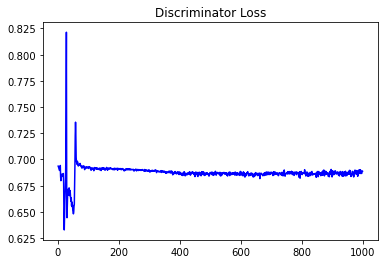

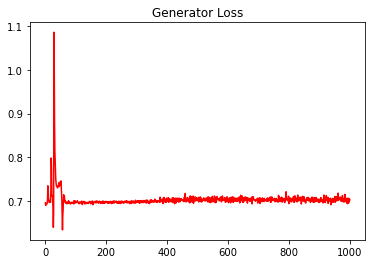

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16090479670436275


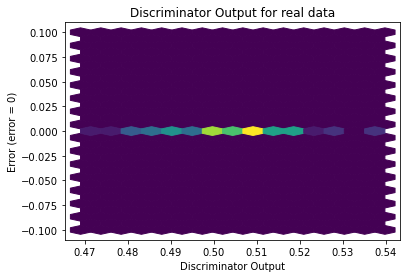

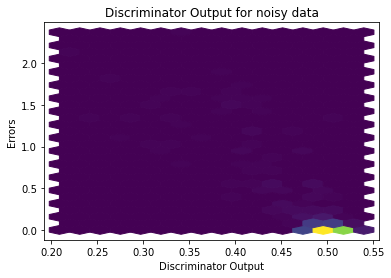

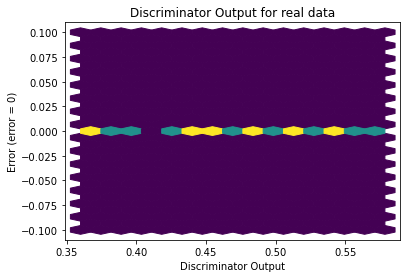

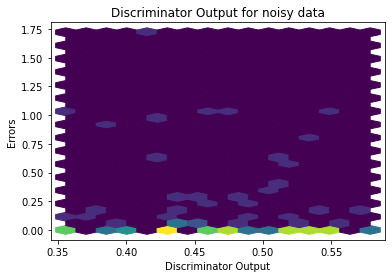

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


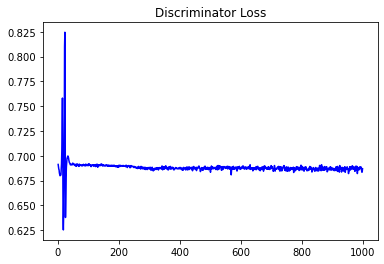

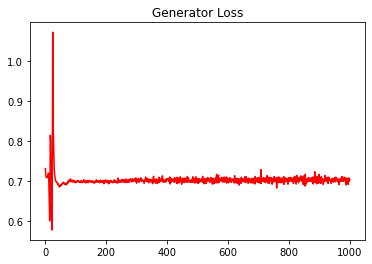

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20384526664655525


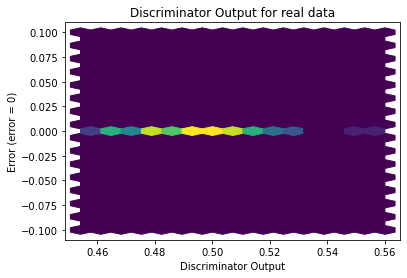

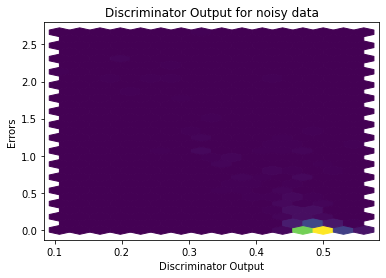

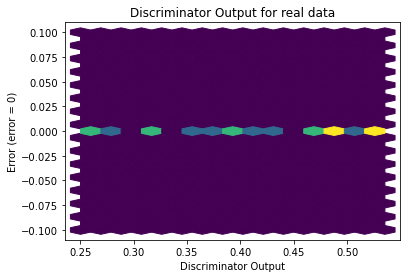

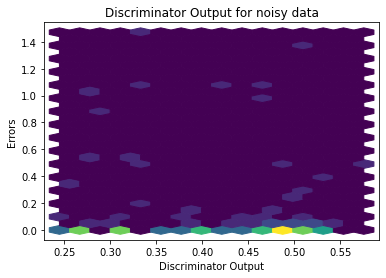

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9937]], requires_grad=True)
